# Imports:

In [1]:
from collections import defaultdict
import sys, os, re, argparse, natsort
import pandas as pd
import numpy as np
from tqdm import tqdm
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide the code."></form>''')

# Functions:

In [7]:
def read_annotation(file):
    columns = ["sample", "total_circRNAs", "total_exonic", "true_exonic", "single_annotated_junction", 
               "antisens_exonic", "monoexonic", "total_infraexonic", "infraexonic_sens", 
               "infraexonic_antisens", "true_intronic", "annotated", "non_annotated"]
    df = pd.read_table(file, sep = '\t', names=columns)
    return df

# I. Number of circRNAs for each category: 

In [8]:
df_stats_annot = read_annotation("../stats_annotation_all.tsv")
display(df_stats_annot)

,sample,total_circRNAs,total_exonic,true_exonic,single_annotated_junction,antisens_exonic,monoexonic,total_infraexonic,infraexonic_sens,infraexonic_antisens,true_intronic,annotated,non_annotated
0,cow-testis-neonat2,4530,3462,3069,392,1,134,161,155,6,15,3084,1439
1,cow-testis-neonat1,5470,4227,3709,518,0,120,150,142,8,18,3727,1735
2,cow-testis-neonat3,5178,3897,3434,462,1,138,161,151,10,23,3457,1710
3,cow-liver-K024,2541,1565,1362,202,1,47,507,507,0,8,1370,1170
4,pig-liver-old1,1589,1042,989,52,0,39,141,133,8,10,999,582
5,cow-liver-K018,2257,1307,1129,178,0,37,541,541,0,5,1134,1123
6,cow-testis-adult2,4013,2911,2464,447,0,82,147,145,2,16,2480,1531
7,pig-testis-5,7038,5138,4604,533,0,134,245,238,7,27,4631,2400
8,cow-liver-B005,1892,1144,1003,141,0,28,353,353,0,7,1010,882
9,cow-testis-adult1,2376,1737,1511,226,0,56,89,87,2,8,1519,855


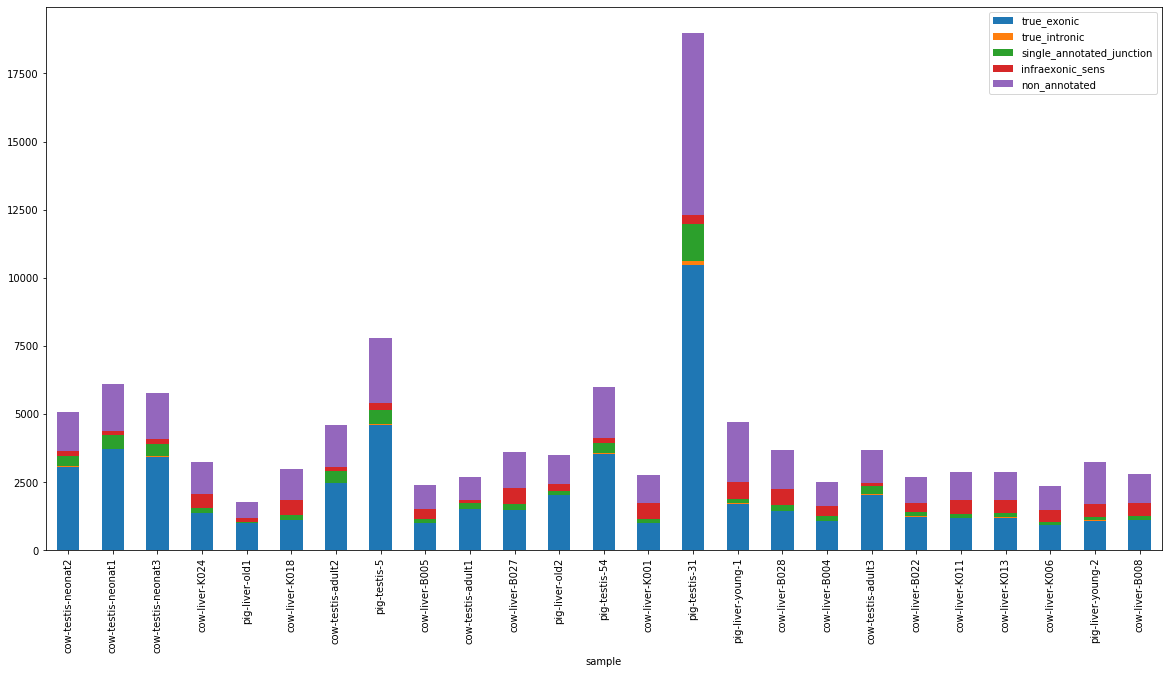

In [9]:
# Stacked bar plot:
columns_df1 = ["sample", "true_exonic", "true_intronic", "single_annotated_junction",
               "infraexonic_sens", "non_annotated"]

df1 = pd.DataFrame(df_stats_annot, columns=columns_df1)
df1.plot.bar(x='sample', stacked=True, figsize=(20,10));

,cow-testis-neonat2,cow-testis-neonat1,cow-testis-neonat3,cow-liver-K024,pig-liver-old1,cow-liver-K018,cow-testis-adult2,pig-testis-5,cow-liver-B005,cow-testis-adult1,...,pig-liver-young-1,cow-liver-B028,cow-liver-B004,cow-testis-adult3,cow-liver-B022,cow-liver-K011,cow-liver-K013,cow-liver-K006,pig-liver-young-2,cow-liver-B008
True exonic,60.532544,60.584776,59.411765,41.920591,56.002265,37.936828,53.530306,59.010510,42.036882,56.233718,...,36.352068,39.503817,43.317422,55.024311,46.165302,40.969317,42.114445,38.962144,33.527607,39.478385
True intronic,0.295858,0.294022,0.397924,0.246230,0.566251,0.168011,0.347599,0.346065,0.293378,0.297730,...,0.551432,0.136314,0.159109,0.405186,0.186150,0.139470,0.104676,0.085070,0.674847,0.142908
Single annotated junction,7.731755,8.461287,7.993080,6.217298,2.944507,5.981183,9.711058,6.831582,5.909472,8.410867,...,3.372216,5.779716,6.523469,8.481902,6.515264,5.753138,6.315422,5.912378,3.466258,5.680600
Infraexonic sens,3.057199,2.319503,2.612457,15.604801,7.531144,18.178763,3.150119,3.050500,14.794635,3.237812,...,12.852598,15.839695,14.797136,3.187466,12.062547,17.085077,15.840893,17.354317,14.509202,16.291533
Non annotated,28.382643,28.340412,29.584775,36.011080,32.955832,37.735215,33.260917,30.761343,36.965633,31.819873,...,46.871686,38.740458,35.202864,32.901135,35.070737,36.052999,35.624564,37.686091,47.822086,38.406574


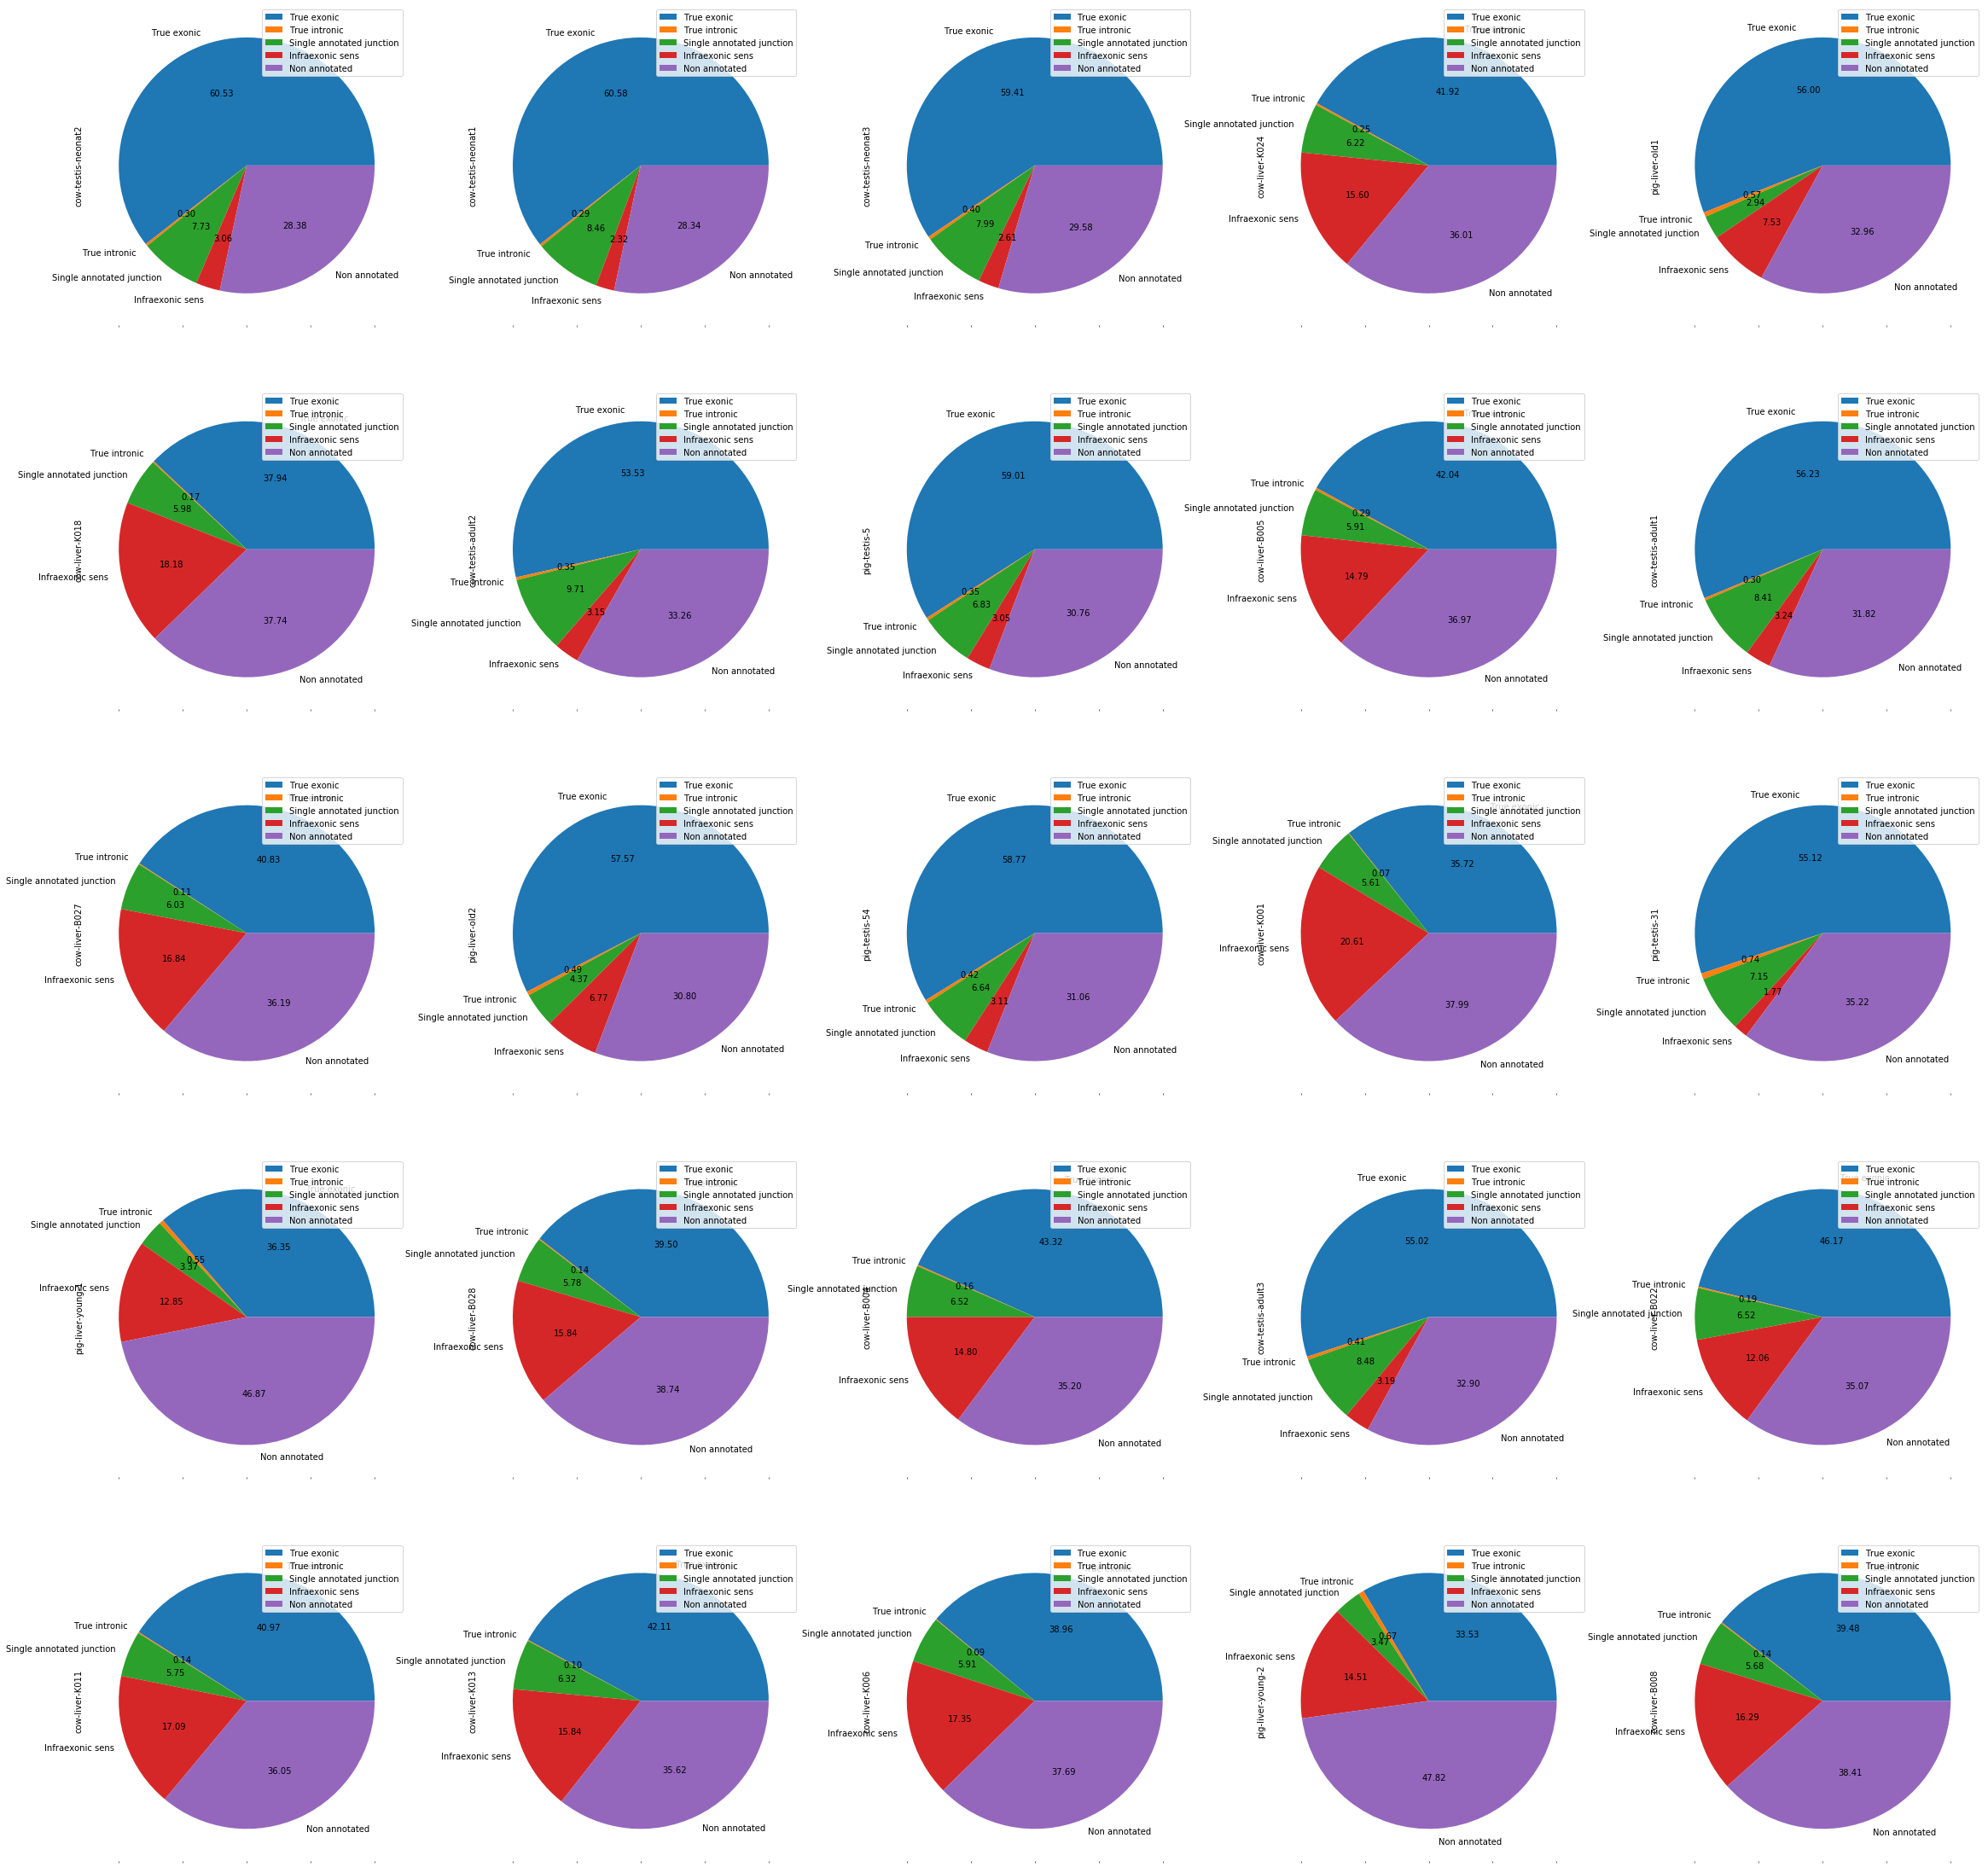

In [17]:
# Pie:
df1["tot"] = (df_stats_annot["true_exonic"] + df_stats_annot["true_intronic"] + 
              df_stats_annot["single_annotated_junction"] + df_stats_annot["infraexonic_sens"] + 
              df_stats_annot["non_annotated"])

df1["%_true_exonic"] = (df1["true_exonic"]*100)/df1["tot"]
df1["%_true_intronic"] = (df1["true_intronic"]*100)/df1["tot"]
df1["%_single_annotated_junction"] = (df1["single_annotated_junction"]*100)/df1["tot"]
df1["%_infraexonic_sens"] = (df1["infraexonic_sens"]*100)/df1["tot"]
df1["%_non_annotated"] = (df1["non_annotated"]*100)/df1["tot"]

d = df1.set_index('sample')[["%_true_exonic","%_true_intronic","%_single_annotated_junction", 
                             "%_infraexonic_sens", "%_non_annotated"]].T.to_dict('list')
df2 = pd.DataFrame(d, index=['True exonic', 'True intronic', 'Single annotated junction', 
                             'Infraexonic sens', 'Non annotated'])
display(df2.head(5))
plot = df2.plot.pie(subplots=True, autopct='%.2f', figsize=(40, 40), layout=(5,5));